In [6]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
import os
import nibabel,numpy
import sklearn.svm
import nilearn.input_data
import nilearn.plotting
%matplotlib inline


In [4]:
m=nilearn.input_data.NiftiMasker(mask_img='fMRI_DataSet/nback_mask.nii.gz')
data=m.fit_transform('fMRI_DataSet/nback_zstats1-11-21_all.nii.gz')

# create conditions indicator: 0=faces, 1=scenes, 2=characters
conditions=numpy.zeros(data.shape[0])
conditions[15:30]=1
conditions[30:]=2

# create sessions indicator
sessions=numpy.kron(numpy.ones(3),numpy.arange(15))


/home/irfanalidv/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/irfanalidv/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/artist.py:879: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


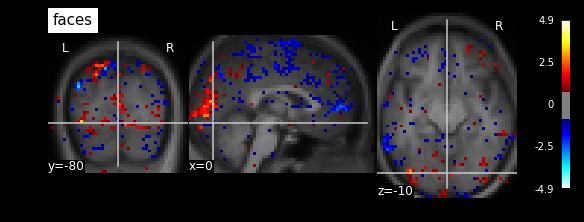

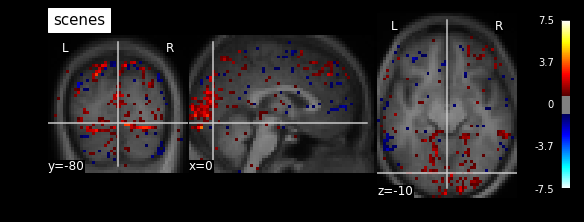

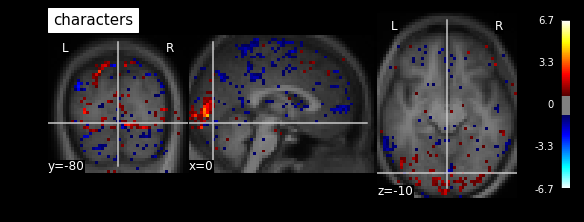

In [13]:
# show mean images
anat_img=nibabel.load('fMRI_DataSet/TRIO_Y_NDC_333_fsl.nii.gz')
faces_img=nibabel.load('fMRI_DataSet/nback_zstat1_mean.nii.gz')
thresh=0.8
coords=(0,-80,-10)
nilearn.plotting.plot_stat_map(faces_img,bg_img=anat_img,threshold=thresh,title='faces',cut_coords=coords)

scenes_img=nibabel.load('fMRI_DataSet/nback_zstat11_mean.nii.gz')
nilearn.plotting.plot_stat_map(scenes_img,bg_img=anat_img,threshold=thresh,title='scenes',cut_coords=coords)

chars_img=nibabel.load('fMRI_DataSet/nback_zstat21_mean.nii.gz')
nilearn.plotting.plot_stat_map(chars_img,bg_img=anat_img,threshold=thresh,title='characters',cut_coords=coords)